In [4]:
from PIL import Image
import os
import numpy as np

In [11]:
## extract data from xml files into txt files
import xml.etree.ElementTree as ET

img_width = 504
img_height = 747

base_dir = 'data/custom/labels'
len = 0
for xml_file in os.listdir(base_dir):
    if xml_file.endswith('xml'):
        len += 1
# print(len)

for ind in range(len):
    xml_file = f'{ind}.xml'
    root = ET.parse(os.path.join(base_dir, xml_file)).getroot()
    txt_file = f'{ind}.txt'

    f = open(os.path.join(base_dir, txt_file), 'w+')
    for object in root.findall('./object/bndbox'):
        xmin = int(object[0].text)
        ymin = int(object[1].text)
        xmax = int(object[2].text)
        ymax = int(object[3].text)

        xcenter = ((xmin + xmax) / 2.0) / img_width
        ycenter = ((ymin + ymax) / 2.0) / img_height
        bbox_width = (xmax - xmin) / img_width
        bbox_height = (ymax - ymin) / img_height

        f.write(f'0 {xcenter} {ycenter} {bbox_width} {bbox_height}\n')
        print(f'0 {xcenter} {ycenter} {bbox_width} {bbox_height}')
    f.close()
    print('\n')


0 0.9146825396825397 0.19544846050870146 0.16666666666666666 0.10174029451137885
0 0.4642857142857143 0.29518072289156627 0.32936507936507936 0.09504685408299866
0 0.08531746031746032 0.17737617135207498 0.1626984126984127 0.11646586345381527


0 0.9226190476190477 0.2543507362784471 0.15079365079365079 0.11244979919678715
0 0.5734126984126984 0.37751004016064255 0.21428571428571427 0.10174029451137885
0 0.20734126984126985 0.33065595716198126 0.20833333333333334 0.107095046854083


0 0.9226190476190477 0.25301204819277107 0.15476190476190477 0.12048192771084337
0 0.5793650793650794 0.3788487282463186 0.2222222222222222 0.107095046854083
0 0.20634920634920634 0.3326639892904953 0.19047619047619047 0.09504685408299866


0 0.9206349206349206 0.24765729585006693 0.15873015873015872 0.11244979919678715
0 0.5694444444444444 0.37215528781793844 0.24206349206349206 0.10977242302543508
0 0.22321428571428573 0.33065595716198126 0.21626984126984128 0.10441767068273092


0 0.9226190476190477 0.24

In [2]:
# test written functions - model/data confie parsing
from utils.utils import *
classes = load_classes('data/custom/classes.names')
module_defs = parse_model_config('config/yolov3-custom.cfg')
print(f'{len(module_defs)}')
for item in module_defs:
    # if item['type'] == 'yolo':
    #     print(item)
    print(item)

108
{'type': 'net', 'batch': '16', 'subdivisions': '1', 'width': '416', 'height': '416', 'channels': '3', 'momentum': '0.9', 'decay': '0.0005', 'angle': '0', 'saturation': '1.5', 'exposure': '1.5', 'hue': '.1', 'learning_rate': '0.001', 'burn_in': '1000', 'max_batches': '500200', 'policy': 'steps', 'steps': '400000,450000', 'scales': '.1,.1'}
{'type': 'convolutional', 'batch_normalize': '1', 'filters': '32', 'size': '3', 'stride': '1', 'pad': '1', 'activation': 'leaky'}
{'type': 'convolutional', 'batch_normalize': '1', 'filters': '64', 'size': '3', 'stride': '2', 'pad': '1', 'activation': 'leaky'}
{'type': 'convolutional', 'batch_normalize': '1', 'filters': '32', 'size': '1', 'stride': '1', 'pad': '1', 'activation': 'leaky'}
{'type': 'convolutional', 'batch_normalize': '1', 'filters': '64', 'size': '3', 'stride': '1', 'pad': '1', 'activation': 'leaky'}
{'type': 'shortcut', 'from': '-3', 'activation': 'linear'}
{'type': 'convolutional', 'batch_normalize': '1', 'filters': '128', 'size': 

In [45]:
# Understand image preprocessing pipeline
from utils.datasets import pad_to_square
import torchvision.transforms as transforms

path = 'data/custom/images/0.jpg'
img = Image.open(path)
img_np = np.array(Image.open(path))
img_tensor = transforms.ToTensor()(img.convert('RGB'))

print(img.size)
print(img_np.shape)
print(img_tensor.shape)

img_padded, pad = pad_to_square(img_tensor, 0)
print(img_padded.size())
print(pad)

(504, 747)
(747, 504)
torch.Size([3, 747, 504])
torch.Size([3, 747, 747])
(121, 122, 0, 0)


In [18]:
# Understand YOLO layer Implementation
grid_x = torch.arange(9).repeat(9, 1).view([1,1,9,9]).type(torch.FloatTensor)
grid_y = torch.arange(9).repeat(9, 1).t().view([1,1,9,9]).type(torch.FloatTensor)
print(grid_x)
print(grid_y)

tensor([[[[0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.],
          [0., 1., 2., 3., 4., 5., 6., 7., 8.]]]])
tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [2., 2., 2., 2., 2., 2., 2., 2., 2.],
          [3., 3., 3., 3., 3., 3., 3., 3., 3.],
          [4., 4., 4., 4., 4., 4., 4., 4., 4.],
          [5., 5., 5., 5., 5., 5., 5., 5., 5.],
          [6., 6., 6., 6., 6., 6., 6., 6., 6.],
          [7., 7., 7., 7., 7., 7., 7., 7., 7.],
          [8., 8., 8., 8., 8., 8., 8., 8., 8.]]]])


In [24]:
["Metrics", *[f"YOLO Layer {i}" for i in range(5)]]

metrics = ["grid_size", "loss", "x", "y", "w", "h", "conf", "cls", "cls_acc", "recall50", "recall75", "precision", "conf_obj", "conf_noobj"]
{m: "%.6f" for m in metrics}

['Metrics',
 'YOLO Layer 0',
 'YOLO Layer 1',
 'YOLO Layer 2',
 'YOLO Layer 3',
 'YOLO Layer 4']

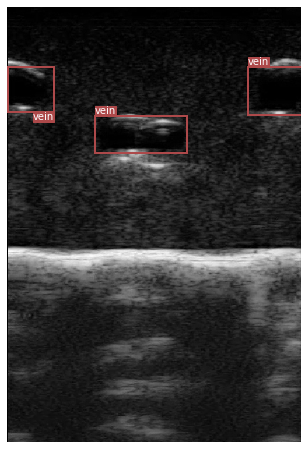

In [48]:
## Model Prediction on Single Image
from yolo_model import Darknet
from datasets import pad_to_square, resize
from utils import non_max_suppression, rescale_boxes, load_classes

import torch
import torchvision.transforms as transforms
from torch.autograd import Variable

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from matplotlib.ticker import NullLocator

# model set up
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Darknet('config/yolov3-custom.cfg', img_size=416).to(device)
model.load_state_dict(torch.load('checkpoints/yolov3_ckpt_38.pth'))
model.eval()

# image preprocessing
img_path = 'data/custom/images/0.jpg'
img = transforms.ToTensor()(Image.open(img_path))
img, _ = pad_to_square(img, 0)
img = resize(img, 416).unsqueeze(0)
Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
img_tensor = Variable(img.type(Tensor))

# model prediction
with torch.no_grad():
    detections = model(img_tensor)
    detections = non_max_suppression(detections, conf_thres=0.85, nms_thres=0.35)
# print(f"detections: {detections[0]}")

# result visualization
img_np = np.array(Image.open(img_path))
detections = rescale_boxes(detections[0], 416, img_np.shape[:2])
# print(f"rescaled detections: {detections}")

fig, ax = plt.subplots(1, figsize=(12,8))
ax.imshow(img_np, cmap='gray')
cmap = plt.get_cmap("tab20b")
classes = load_classes('data/custom/classes.names')
for x1, y1, x2, y2, obj_conf, cls_conf, cls_pred in detections:
    # print("\t+ Label: %s, obj_conf: %.5f, cls_conf: %.5f" % (classes[int(cls_pred)], obj_conf.item(), cls_conf.item()))
    x1_draw = max(x1, 1)
    y1_draw = max(y1, 1)
    x2_draw = min(x2, img_np.shape[0] - 1)
    y2_draw = min(y2, img_np.shape[1] - 1)

    color = cmap(13)
    bbox = patches.Rectangle((x1_draw, y1_draw), x2_draw - x1_draw, y2_draw - y1_draw, linewidth=2, edgecolor=color, facecolor="none") # create a rectangle patch
    ax.add_patch(bbox) # add bbox to the plot
    # add label
    if x1 > 0:
        plt.text(x1, y1, s=classes[int(cls_pred)], color="white", verticalalignment="bottom", horizontalalignment='left', bbox={"color": color, "pad": 0})
    elif x2 < img_np.shape[1]:
        plt.text(x2, y2, s=classes[int(cls_pred)], color="white", verticalalignment="top", horizontalalignment='right', bbox={"color": color, "pad": 0})

plt.axis("off")
plt.gca().xaxis.set_major_locator(NullLocator())
plt.gca().yaxis.set_major_locator(NullLocator())
plt.show()

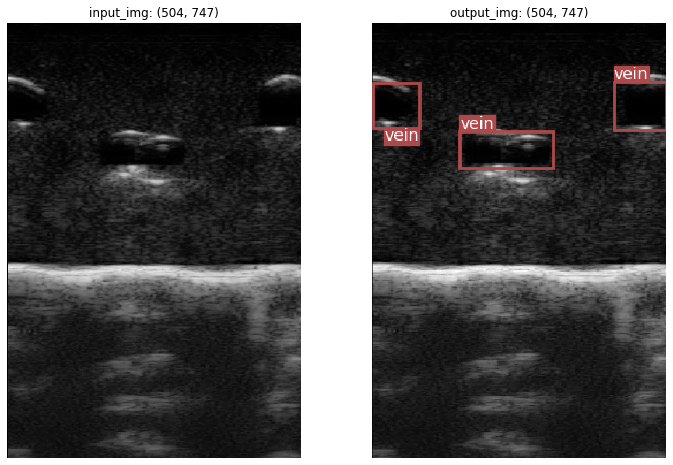

In [49]:
# Visualization Comparison between input_img and output_img
input_img = Image.open('data/custom/images/0.jpg').convert('RGB')
output_img = Image.open('output/0.png')

imgs = [input_img, output_img]
titles = [f'input_img: {input_img.size}', f'output_img: {output_img.size}']
plt.figure(figsize=(12,8))
for i, (img, title) in enumerate(zip(imgs, titles)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')